# IE4483 Artificial Intelligence and Data Mining

## Mini Project (Option 2)

<b>Group Members:</b> <br>Wang Bo (U1920077E), Ng Wen Cong (U1922000L), Zhang Mengyuan (U1921206C)

### 1. Loading and preparing the data: 

**Import Libraries**

We import the following 9 types of libraries for the following purposes:

1. Numpy: for performing numerical operations on large quantities of data
2. Pandas: for reading / writing data
3. Matplotlib: for displaying images
4. Tensorflow Keras utils: for converting class vectors to binary class matrices
5. Tensorflow Keras datasets: for cifar10 datasets
6. Tensorflow Keras models: for predicting image result
7. Tensorflow Keras layers: layers for neural network
8. Seaborn: for data visualization
9. CV2: for image processing and performing computer vision tasks

Layers needed by convolutional neural networks (CNN)
1. Conv2D: basic Convolutional layer to train the model
2. Dense: to create fully connected layers, in which every output depends on every input
3. MaxPooling: to select the maximum element from the region of the feature map covered by the filter
4. Flatten: to reduce the input data into a single dimension instead of 2 dimensions
5. Dropout: to reduce the model expressiveness 
6. Activation: functions to derive output from a set of input values fed to a layer

In [1]:
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import RandomFlip, RandomRotation, RandomZoom
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

2022-11-10 22:20:33.063777: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 2. Data processing:

The training data are labelled as dog.0, dog.1, cat.2 etc. After splitting we will get "dog" and "cat" as the category value of the image. We label dog as "1" and cat as "0" to simplify the results.

We have images of different sizes. Hence, we use the following code to make them into the same size.

>cv2.resize(img_array, dsize=(80, 80))


In [2]:
#for train dataset
path_train_cat = "datasets/train/cat"
path_train_dog = "datasets/train/dog"
train_path = "datasets/train"
convert = lambda category : int(category == 'cat')
train_list = os.listdir(path_train_cat) + os.listdir(path_train_dog)
x_train = []
y_train = []
for p in train_list:
    category = p.split(".")[0]
    category = convert(category) # convert to 1/0
    img_array = cv2.imread(os.path.join(train_path,p.split(".")[0],p))
    new_img_array = cv2.resize(img_array, dsize=(80, 80)) # resize
    x_train.append(new_img_array)
    y_train.append(category)
x_train = np.array(x_train).reshape(-1,80,80,3)
y_train = np.array(y_train)

In [3]:
#for validation dataset
path_val_cat = "datasets/val/cat"
path_val_dog = "datasets/val/dog"
val_path = "datasets/val"
val_list = os.listdir(path_val_cat) + os.listdir(path_val_dog)
x_val=[]
y_val=[]
for p in val_list:
    category = p.split(".")[0]
    category = convert(category) # convert to 1/0
    img_array = cv2.imread(os.path.join(val_path,p.split(".")[0],p))
    new_img_array = cv2.resize(img_array, dsize=(80, 80)) # resize
    x_val.append(new_img_array)
    y_val.append(category)
x_val = np.array(x_val).reshape(-1, 80,80,3)
y_val = np.array(y_val)

/Users/xuanyizhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/xuanyizhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


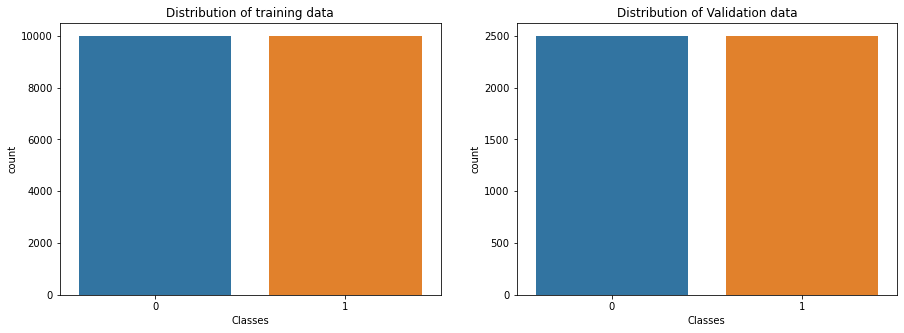

In [4]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_val.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Validation data')
axs[1].set_xlabel('Classes')
plt.show()

In [5]:
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_val /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
num_classes = 2 #The number of class for the datase
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

### 3. Model selection:

We decide to use the CNN model. The following steps define the model:

1. Define a Sequential model with layers as shown below:
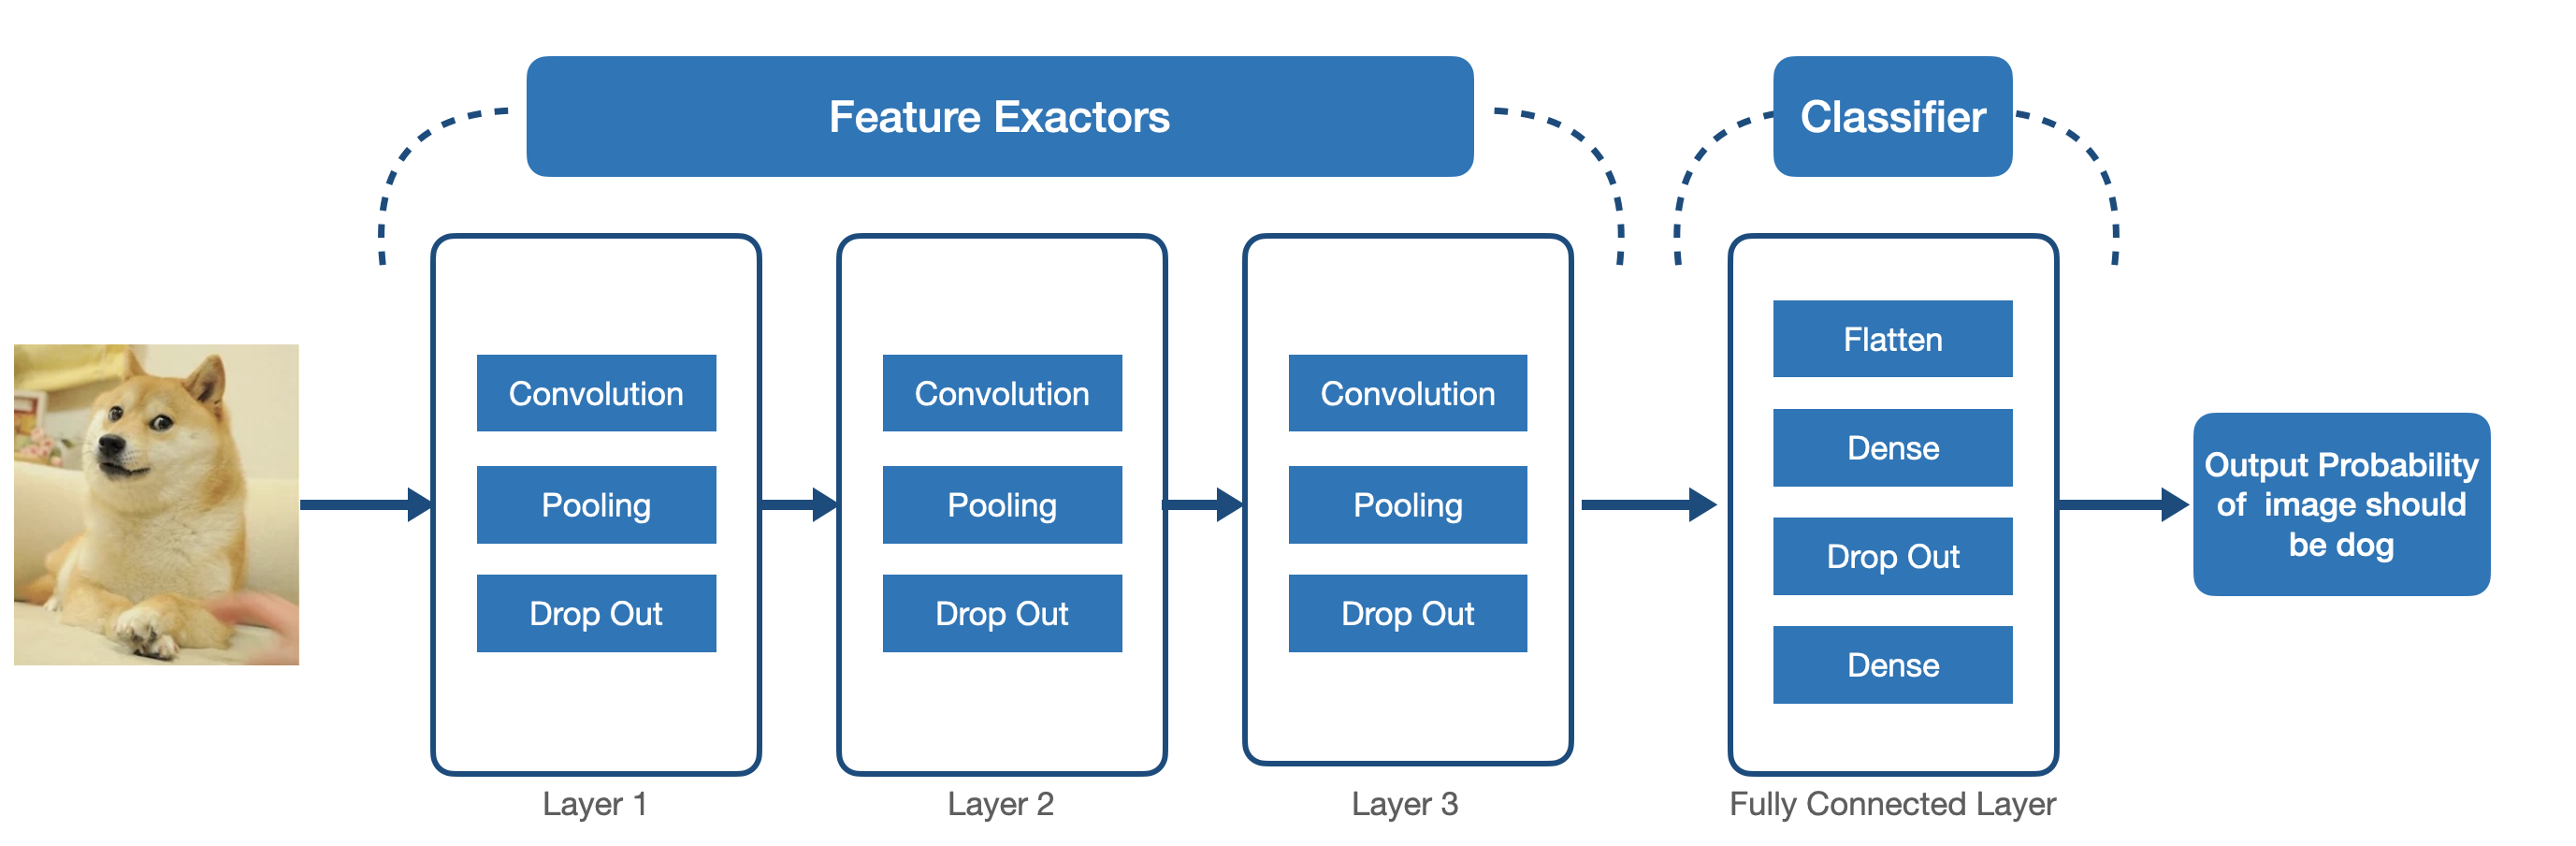
2. Add a Conv2D layer with 32 nodes and kernel size of (3,3). We also experimented with different number of nodes and kernel size. Also we have to specify input shape which is the X shape. We use 'relu' as activation function. 
3. We add max pooling layer with a size of (2,2). 
4. We add dropout 0.25 for feature extrators and 0.5 for classifier.
5. We add a flatten layer and feed our data to dense layer later.
6. We add the final dense layer with softmax activation function.
7. Finally we compile the model with the following parameters: Optimizer, Loss, Metrics. 

**Loss** : We used categorical_crossentropy to minimize loss.

**Optimizer** : We used adam to optimize the cost function.

**Metrics** : We use accuracy to measure the effectiveness of our model.      

In [6]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

2022-11-10 22:21:36.140537: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 4. Model Training:

Now we train our model using the training data with the following parameters:

Batch size: The amount of data pass through the model each time

Epochs: The number of times our model will go through the entire training data

validation_split: 500 images as mentioned to check for cross-validation error

In [7]:
batch_size = 32  
epochs = 15

In [8]:
#callback for early stopping
callback = EarlyStopping(monitor = "accuracy", 
                        min_delta = .03,
                        patience = 2,
                        mode = "auto",
                        restore_best_weights = True)

In [9]:
result = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_val, y_val),
              callbacks = [callback])

Epoch 1/15
625/625 [==============================] - 108s 172ms/step - loss: 0.6468 - accuracy: 0.6134 - val_loss: 0.5843 - val_accuracy: 0.6726
Epoch 2/15
625/625 [==============================] - 103s 164ms/step - loss: 0.5468 - accuracy: 0.7264 - val_loss: 0.4893 - val_accuracy: 0.7678
Epoch 3/15
625/625 [==============================] - 103s 164ms/step - loss: 0.4838 - accuracy: 0.7714 - val_loss: 0.4300 - val_accuracy: 0.7998
Epoch 4/15
625/625 [==============================] - 112s 179ms/step - loss: 0.4321 - accuracy: 0.8041 - val_loss: 0.4101 - val_accuracy: 0.8148
Epoch 5/15
625/625 [==============================] - 108s 172ms/step - loss: 0.4012 - accuracy: 0.8199 - val_loss: 0.3892 - val_accuracy: 0.8200
Epoch 6/15
625/625 [==============================] - 108s 173ms/step - loss: 0.3795 - accuracy: 0.8331 - val_loss: 0.3790 - val_accuracy: 0.8372


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


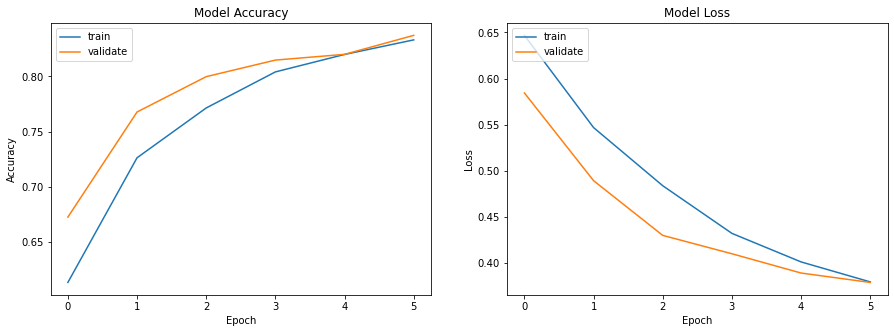

In [10]:
def plotmodelresult(result): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize result for accuracy
    axs[0].plot(result.history['accuracy']) 
    axs[0].plot(result.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize result for loss
    axs[1].plot(result.history['loss']) 
    axs[1].plot(result.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in result
print(result.history.keys())

plotmodelresult(result)

In [11]:
# Score trained model.
scores = model.evaluate(x_val, y_val, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

157/157 [==============================] - 8s 50ms/step - loss: 0.4101 - accuracy: 0.8148
Test loss: 0.41005098819732666
Test accuracy: 0.8148000240325928


### 5. Prediction:

We now use the trained model to classify the test dataset.

In [12]:
test_path = "datasets/test"
test_list = os.listdir(test_path)
X_test=[]
id_line=[]
for p in test_list:
    img_array = cv2.imread(os.path.join(test_path,p))
    new_img_array = cv2.resize(img_array, dsize=(80, 80)) # resize
    X_test.append(new_img_array)
    id_line.append(int(p.split(".")[0]))

X_test = np.array(X_test).reshape(-1, 80,80,3)
X_test = X_test.astype('float32')
X_test /= 255

In [13]:
# make prediction.
pred = model.predict(X_test)

16/16 [==============================] - 1s 51ms/step


In [14]:
import pandas as pd 
predicted_val = [int(round(p[0])) for p in pred]
predicted_val

#save result as submission.csv
submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})
submission_df = submission_df.sort_values('id')
submission_df.to_csv("submission.csv", index=False)

# Cifar-10  (for question g)
Now, We are going to classify images from the CIFAR-10 dataset. The dataset consists of 10 classes. We will adjust and apply our convolutional neural network for all the samples. The images need to be normalized and the labels need to be one-hot encoded.

In [15]:
num_classes = 10 #The number of class for the datase
epochs = 20

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


/Users/xuanyizhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/xuanyizhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


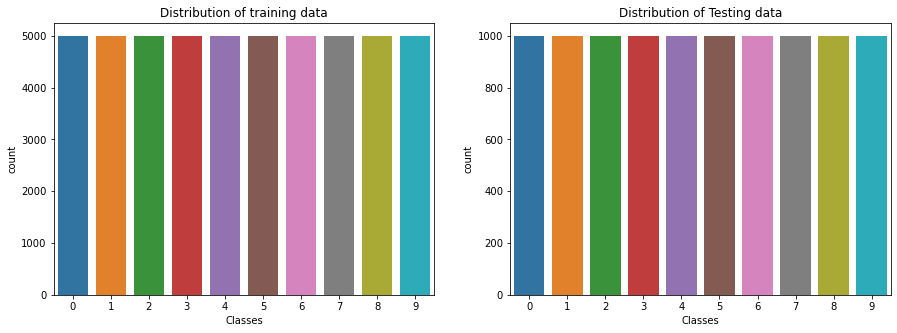

In [16]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

In [17]:
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [18]:
cifar_model = Sequential()

cifar_model.add(Conv2D(64, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
cifar_model.add(MaxPooling2D(pool_size=(2, 2)))
cifar_model.add(Dropout(0.25))

cifar_model.add(Conv2D(64, (3, 3), activation='relu'))
cifar_model.add(MaxPooling2D(pool_size=(2, 2)))
cifar_model.add(Dropout(0.25))

cifar_model.add(Conv2D(64, (3, 3), activation='relu'))
cifar_model.add(MaxPooling2D(pool_size=(2, 2)))
cifar_model.add(Dropout(0.25))

cifar_model.add(Flatten())
cifar_model.add(Dense(64, activation='relu'))
cifar_model.add(Dropout(0.5))
cifar_model.add(Dense(num_classes, activation='softmax'))

cifar_model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cifar_result = cifar_model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 62s 39ms/step - loss: 1.8342 - accuracy: 0.3134 - val_loss: 1.5022 - val_accuracy: 0.4909
Epoch 2/20
1563/1563 [==============================] - 53s 34ms/step - loss: 1.5089 - accuracy: 0.4525 - val_loss: 1.2775 - val_accuracy: 0.5486
Epoch 3/20
1563/1563 [==============================] - 70s 45ms/step - loss: 1.3893 - accuracy: 0.5017 - val_loss: 1.2342 - val_accuracy: 0.5479
Epoch 4/20
1563/1563 [==============================] - 54s 35ms/step - loss: 1.3156 - accuracy: 0.5327 - val_loss: 1.1393 - val_accuracy: 0.5969
Epoch 5/20
1563/1563 [==============================] - 58s 37ms/step - loss: 1.2625 - accuracy: 0.5548 - val_loss: 1.0887 - val_accuracy: 0.6270
Epoch 6/20
1563/1563 [==============================] - 59s 38ms/step - loss: 1.2183 - accuracy: 0.5704 - val_loss: 1.0486 - val_accuracy: 0.6340
Epoch 7/20
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1797 - accuracy: 0.5870 - val_loss: 1.0087 -

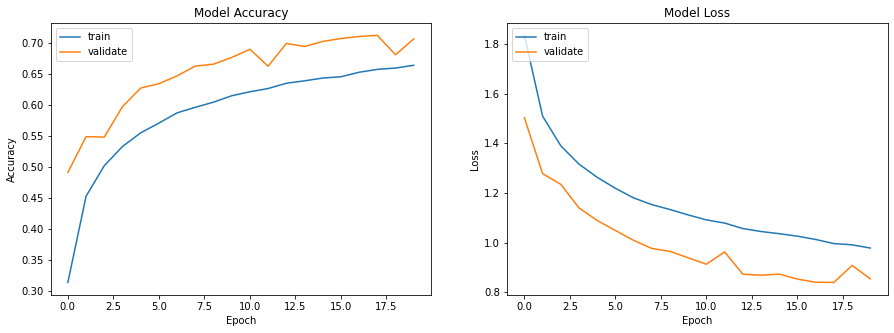

In [20]:
plotmodelresult(cifar_result)

In [21]:
# Score trained model.
scores = cifar_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 5s 14ms/step - loss: 0.8538 - accuracy: 0.7063
Test loss: 0.8537759780883789
Test accuracy: 0.7063000202178955
